# Expert System
## Assignment 1 - [Task 1: Affine Transformation]
***
### Mohammad Riza Farhandhy - 1313617038
***

In [1]:
# Import all the lib we need for this experiment

import matplotlib.pyplot as plt
import numpy as np
import string

In [2]:
# Lets experiment affine transformation with a square

# 2D square matrix
square = np.array([
    [0, 0], # A
    [3, 0], # B
    [3, 3], # C
    [0, 3]  # D
])

# We will need to use the one with homogeneous coordinates
# This needed at 'projective' operation and if we want to chain the transformations
# (and because all my functions, created to only work with the homogeneous one)

def homogeneous_coordinates(matrix):
    return np.concatenate((matrix, np.full((len(matrix), 1), 1)), axis=1)

h_square = homogeneous_coordinates(square)

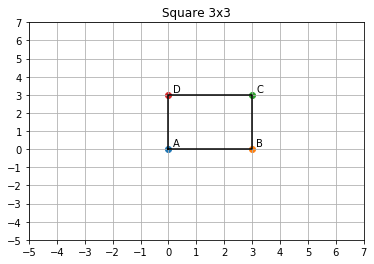

array([[0, 0, 1],
       [3, 0, 1],
       [3, 3, 1],
       [0, 3, 1]])

In [3]:
# Lets see how our square looks like

def plot_m2d(matrix, title, t_matrix=None):
    i = 0
    xs = []
    ys = []
    for row in matrix:
        x, y, w = row
        xs.append(x)
        ys.append(y)
        plt.scatter(x, y)
        plt.text(x+0.15, y+0.15, f"{string.ascii_uppercase[i]}")
        i += 1
    xs.append(xs[0])
    ys.append(ys[0])
    plt.plot(xs, ys, color="k")
    
    if (t_matrix is not None):
        i = 0
        xs = []
        ys = []
        for row in t_matrix:
            x, y, w = row
            xs.append(x)
            ys.append(y)
            plt.scatter(x, y)
            plt.text(x+0.15, y+0.15, f"{string.ascii_uppercase[i]}")
            i += 1
        xs.append(xs[0])
        ys.append(ys[0])
        plt.plot(xs, ys, color="r")
        
    plt.gca().set_xticks(np.arange(-5, 8, 1))
    plt.gca().set_yticks(np.arange(-5, 8, 1))
    plt.title(title)
    plt.grid()
    plt.show()

plot_m2d(h_square, 'Square 3x3')
h_square

In [4]:
# Functions for affine transformation

# SCALING
def t2d_scaling(sx, sy):
    m_scaling = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    return m_scaling

# TRANSLATION
def t2d_translation(tx, ty):
    m_translation = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return m_translation

# ROTATION
def t2d_rotation(degree):
    m_rotation = np.array([
        [np.cos(np.radians(degree)), -np.sin(np.radians(degree)), 0],
        [np.sin(np.radians(degree)), np.cos(np.radians(degree)), 0],
        [0, 0, 1]
    ])
    return m_rotation

# TRANSFORMATION
def transform_2d(matrix, transformation):
    return (transformation @ matrix.transpose()).transpose()


# Function for projective transformation

# H variation from Affine(?)
def h_projective(tx, ty, sx, sy, degree, p1, p2):
    H = t2d_translation(tx, ty) @ t2d_scaling(sx, sy) @ t2d_rotation(degree)
    H[2] = [p1, p2, 1]
    return H

# PROJECTIVE
def projective_2d(matrix, H):
    res = H @ matrix.transpose()
    res = res / res[2]
    return res.transpose()

***
### Scaling

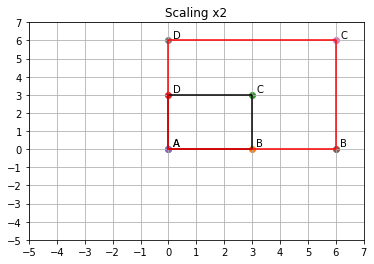

array([[0, 0, 1],
       [6, 0, 1],
       [6, 6, 1],
       [0, 6, 1]])

In [5]:
scaling = transform_2d(h_square, t2d_scaling(2, 2))

plot_m2d(h_square, 'Scaling x2', scaling)
scaling

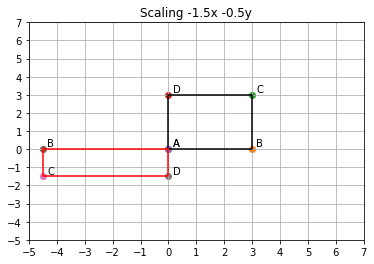

array([[ 0. ,  0. ,  1. ],
       [-4.5,  0. ,  1. ],
       [-4.5, -1.5,  1. ],
       [ 0. , -1.5,  1. ]])

In [6]:
scaling = transform_2d(h_square, t2d_scaling(-1.5, -0.5))

plot_m2d(h_square, 'Scaling -1.5x -0.5y', scaling)
scaling

***
### Translation

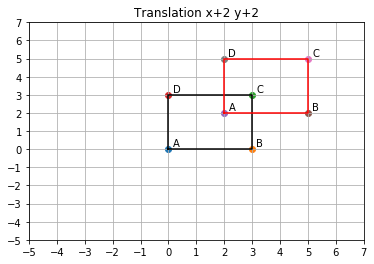

array([[2, 2, 1],
       [5, 2, 1],
       [5, 5, 1],
       [2, 5, 1]])

In [7]:
translation = transform_2d(h_square, t2d_translation(2, 2))

plot_m2d(h_square, 'Translation x+2 y+2', translation)
translation

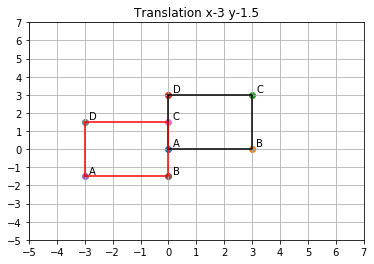

array([[-3. , -1.5,  1. ],
       [ 0. , -1.5,  1. ],
       [ 0. ,  1.5,  1. ],
       [-3. ,  1.5,  1. ]])

In [8]:
translation = transform_2d(h_square, t2d_translation(-3, -1.5))

plot_m2d(h_square, 'Translation x-3 y-1.5', translation)
translation

***
### Rotation

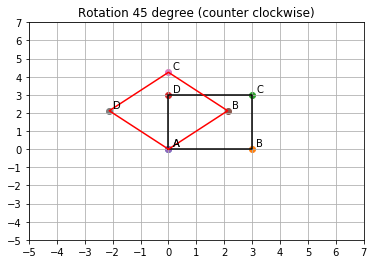

array([[-3. , -1.5,  1. ],
       [ 0. , -1.5,  1. ],
       [ 0. ,  1.5,  1. ],
       [-3. ,  1.5,  1. ]])

In [9]:
rotation = transform_2d(h_square, t2d_rotation(45))

plot_m2d(h_square, 'Rotation 45 degree (counter clockwise)', rotation)
translation

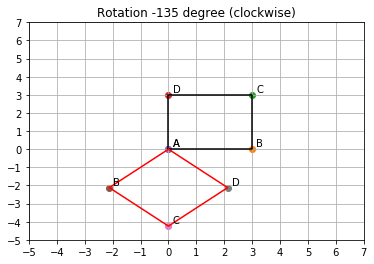

array([[-3. , -1.5,  1. ],
       [ 0. , -1.5,  1. ],
       [ 0. ,  1.5,  1. ],
       [-3. ,  1.5,  1. ]])

In [10]:
rotation = transform_2d(h_square, t2d_rotation(-135))

plot_m2d(h_square, 'Rotation -135 degree (clockwise)', rotation)
translation

***
### Combination / Affine(?)

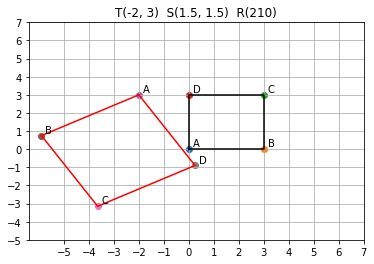

array([[-2.        ,  3.        ,  1.        ],
       [-5.89711432,  0.75      ,  1.        ],
       [-3.64711432, -3.14711432,  1.        ],
       [ 0.25      , -0.89711432,  1.        ]])

In [11]:
transformation = transform_2d(h_square, 
    t2d_translation(-2, 3) @ t2d_scaling(1.5, 1.5) @ t2d_rotation(210))

plot_m2d(h_square, 'T(-2, 3)  S(1.5, 1.5)  R(210)', transformation)
transformation

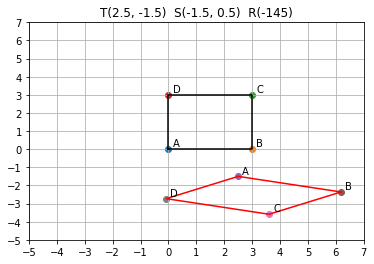

array([[ 2.5       , -1.5       ,  1.        ],
       [ 6.1861842 , -2.36036465,  1.        ],
       [ 3.60509024, -3.58909272,  1.        ],
       [-0.08109396, -2.72872807,  1.        ]])

In [12]:
transformation = transform_2d(h_square, 
    t2d_translation(2.5, -1.5) @ t2d_scaling(-1.5, 0.5) @ t2d_rotation(-145))

plot_m2d(h_square, 'T(2.5, -1.5)  S(-1.5, 0.5)  R(-145)', transformation)
transformation

***
### Projective

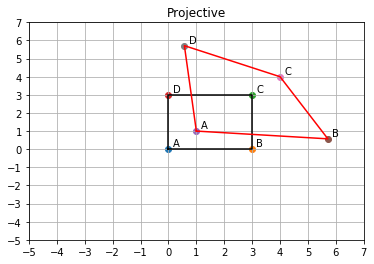

array([[1.        , 1.        , 1.        ],
       [5.71428571, 0.57142857, 1.        ],
       [4.        , 4.        , 1.        ],
       [0.57142857, 5.71428571, 1.        ]])

In [13]:
H = np.array([
    [3, 0, 1],
    [0, 3, 1],
    [0.25, 0.25, 1]
])

projective = projective_2d(h_square, H)

plot_m2d(h_square, 'Projective', projective)
projective

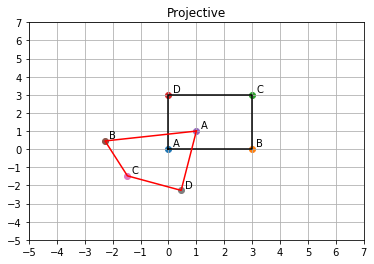

array([[ 1.        ,  1.        ,  1.        ],
       [-2.27272727,  0.45454545,  1.        ],
       [-1.47058824, -1.47058824,  1.        ],
       [ 0.45454545, -2.27272727,  1.        ]])

In [14]:
H = h_projective(1, 1, 2, 2, 180, 0.40, 0.40)

projective = projective_2d(h_square, H)

plot_m2d(h_square, 'Projective', projective)
projective